# Playing with I
----

Noise amplitude


interactive(children=(FloatSlider(value=0.0, description='noise_amp', max=0.5, step=0.01), Output()), _dom_cla…

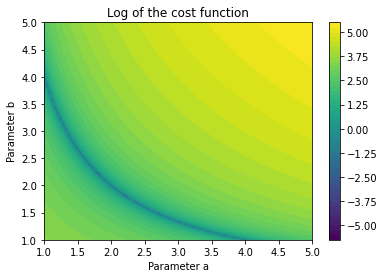

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def test_fun(a, b, x):
    '''Basic test function with two parameters a and b'''
    return a * b * x**2

def noise(b,t):
    '''Sinusoidal noise of amplitude b and frequency w'''
    return np.random.normal(0,b,len(t))
    
def comp_I_bin(dXdT):
    '''Computes the identifiability indicator from a given sensitivity matrix'''
    numVars = dXdT.shape[0]
    H = np.zeros((numVars, numVars))
    T = dXdT.shape[1]
    for i in range(0,numVars):
        for j in range(0,numVars):
            H[i,j] = np.nansum(dXdT[i]*dXdT[j])

    lams = np.linalg.eigvals(H)
    I = np.log10(np.max(lams)/np.min(lams))
    return I

def plot_costFun():
    a=2
    b=2
    T = 100
    t = np.linspace(0,5,T)
    U = test_fun(a, b, t)
    a_grid = np.linspace(1.,5.,100)
    b_grid = np.linspace(1.,5.,100)
    A, B = np.meshgrid(a_grid, b_grid)
    costFun = np.zeros((100, 100))
    for i in range(0, 100):
        for j in range(0, 100):
            funVal = test_fun(A[i,j], B[i,j], t)
            costFun[i, j] = math.sqrt(np.sum((funVal - U)**2)/T)
    plt.figure()
    plt.contourf(A, B, np.log(costFun), 50)
    plt.xlabel("Parameter a")
    plt.ylabel("Parameter b")
    plt.title("Log of the cost function")
    plt.colorbar()
    plt.show()
    plt.close()

def comp_sensi_vector(noise_amp=0.):
    a = 2.
    b = 2.  
    T = 100
    eps = 0.05
    t = np.linspace(0,5,T)
    U = test_fun(a, b, t) + noise(noise_amp, t)
    U_5pc = test_fun((1.+eps)*a, b, t) + noise(noise_amp, t)
    U_5pc_noise = test_fun(a, (1.+eps) * b, t) + noise(noise_amp, t)

    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.title("Function f")
    plt.plot(t, U, label="$f_{a,b}(t)$")
    plt.plot(t, U_5pc, label="$f_{1.05*a,b}(t)$")
    plt.plot(t, U_5pc_noise, label="$f_{a,1.05*b}(t)+noise$")
    plt.xlabel("t")
    plt.ylabel("f(t)")
    plt.legend()

    plt.subplot(122)
    plt.title("Sensitivity variation")
    dSdX = np.zeros((2,T))
    dSdX[0,:] = (U_5pc - U)/(eps * math.sqrt(T) * np.max(U))
    dSdX[1,:] = (U_5pc_noise - U)/(eps * math.sqrt(T) * np.max(U))
    plt.plot(t, dSdX[0], label="$f_{1.05*a,b}(t)$")
    plt.plot(t, dSdX[1], label="$f_{a,1.05*b}(t)+noise$")
    plt.xlabel("t")
    plt.ylabel("$df/d\\theta$")
    plt.legend()
    plt.show()
    plt.close()
    
    I = comp_I_bin(dSdX)
    print("Value of I: {:.02f}".format(I))

 
print("Noise amplitude")
interact(comp_sensi_vector, noise_amp=(0.,0.5,0.01))

plot_costFun()

